# Extract Insights from The CADT Students Code Logs During Practical Sessions 
Output.json file

In [22]:
import pandas as pd
import numpy as np 
import json

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# matplotlib.use('tkagg')
%matplotlib inline

In [45]:

df = pd.read_json('output.json', lines=True)
print(df.head().to_string())

     user language                                                filename subject_code  issaved                date  n_action_list  action text               timestamp  line  charStartInLineAt  charStartInTextAt  numberSelect  durations                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

# Explore Data

In [24]:
df

,user,language,filename,subject_code,issaved,date,n_action_list,action,text,timestamp,line,charStartInLineAt,charStartInTextAt,numberSelect,durations,snapcode
0,anolik,c,c:\Users\Lenovo\Downloads\Telegram Desktop\Mai...,IDT_ALGO_G1,False,2023-07-31 07:51:53,1,delete,,2023-07-31 07:50:58.341,213,20,6890,1,0,#include<stdio.h>\r\n#include<stdlib.h>\r\n#in...
1,anolik,c,c:\Users\Lenovo\Downloads\Telegram Desktop\Mai...,IDT_ALGO_G1,False,2023-07-31 07:51:58,23,delete,),2023-07-31 07:50:58.934,213,19,6889,1,0,#include<stdio.h>\r\n#include<stdlib.h>\r\n#in...
2,anolik,c,c:\Users\Lenovo\Downloads\Telegram Desktop\Mai...,IDT_ALGO_G1,False,2023-07-31 07:51:58,23,delete,t,2023-07-31 07:50:58.972,213,18,6888,1,38,#include<stdio.h>\r\n#include<stdlib.h>\r\n#in...
3,anolik,c,c:\Users\Lenovo\Downloads\Telegram Desktop\Mai...,IDT_ALGO_G1,False,2023-07-31 07:51:58,23,delete,n,2023-07-31 07:50:59.002,213,17,6887,1,30,#include<stdio.h>\r\n#include<stdlib.h>\r\n#in...
4,anolik,c,c:\Users\Lenovo\Downloads\Telegram Desktop\Mai...,IDT_ALGO_G1,False,2023-07-31 07:51:58,23,delete,i,2023-07-31 07:50:59.024,213,16,6886,1,22,#include<stdio.h>\r\n#include<stdlib.h>\r\n#in...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345607,yupich,c,c:\Users\CADT-1\OneDrive\Term 2 cpf\sum_pointer.c,IDT_ALGO_G6,False,2023-07-27 03:20:42,2,delete,t,2023-07-27 03:20:39.157,3,18,40,1,209,"#include <stdio.h>\r\n\r\nvoid sum(int st , th..."
345608,yupich,c,c:\Users\CADT-1\OneDrive\Term 2 cpf\sum_pointer.c,IDT_ALGO_G6,False,2023-07-27 03:20:47,4,add,i,2023-07-27 03:20:46.475,3,18,40,0,0,"#include <stdio.h>\r\n\r\nvoid sum(int st , in..."
345609,yupich,c,c:\Users\CADT-1\OneDrive\Term 2 cpf\sum_pointer.c,IDT_ALGO_G6,False,2023-07-27 03:20:47,4,add,n,2023-07-27 03:20:46.663,3,19,41,0,188,"#include <stdio.h>\r\n\r\nvoid sum(int st , in..."
345610,yupich,c,c:\Users\CADT-1\OneDrive\Term 2 cpf\sum_pointer.c,IDT_ALGO_G6,False,2023-07-27 03:20:47,4,add,t,2023-07-27 03:20:46.803,3,20,42,0,140,"#include <stdio.h>\r\n\r\nvoid sum(int st , in..."


In [26]:
print(df.describe())


       n_action_list           line  charStartInLineAt  charStartInTextAt  \
count  345612.000000  345612.000000      345612.000000      345612.000000   
mean       10.601547      19.257653          18.037467         391.972831   
std        21.682635      32.749560          24.155149         912.702629   
min         1.000000       0.000000           0.000000           0.000000   
25%         4.000000       6.000000           8.000000          92.000000   
50%         7.000000      11.000000          14.000000         210.000000   
75%        11.000000      20.000000          23.000000         386.000000   
max       370.000000     620.000000         676.000000      141977.000000   

        numberSelect     durations  
count  345612.000000  3.456120e+05  
mean        1.642087  3.805236e+02  
std       143.648661  3.052216e+03  
min         0.000000  0.000000e+00  
25%         0.000000  2.800000e+01  
50%         0.000000  1.870000e+02  
75%         0.000000  4.440000e+02  
max     71

In [27]:
print(df.dtypes)


user                         object
language                     object
filename                     object
subject_code                 object
issaved                        bool
date                 datetime64[ns]
n_action_list                 int64
action                       object
text                         object
timestamp            datetime64[ns]
line                          int64
charStartInLineAt             int64
charStartInTextAt             int64
numberSelect                  int64
durations                     int64
snapcode                     object
dtype: object


In [28]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345612 entries, 0 to 345611
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user               345612 non-null  object        
 1   language           345612 non-null  object        
 2   filename           345612 non-null  object        
 3   subject_code       345612 non-null  object        
 4   issaved            345612 non-null  bool          
 5   date               345612 non-null  datetime64[ns]
 6   n_action_list      345612 non-null  int64         
 7   action             345612 non-null  object        
 8   text               345612 non-null  object        
 9   timestamp          345612 non-null  datetime64[ns]
 10  line               345612 non-null  int64         
 11  charStartInLineAt  345612 non-null  int64         
 12  charStartInTextAt  345612 non-null  int64         
 13  numberSelect       345612 non-null  int64   

In [29]:
print(df.columns)


Index(['user', 'language', 'filename', 'subject_code', 'issaved', 'date',
       'n_action_list', 'action', 'text', 'timestamp', 'line',
       'charStartInLineAt', 'charStartInTextAt', 'numberSelect', 'durations',
       'snapcode'],
      dtype='object')


In [30]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].nunique()}")


Unique values in user: 112
Unique values in language: 1
Unique values in filename: 863
Unique values in subject_code: 5
Unique values in issaved: 2
Unique values in date: 42839
Unique values in n_action_list: 105
Unique values in action: 8
Unique values in text: 6842
Unique values in timestamp: 344239
Unique values in line: 330
Unique values in charStartInLineAt: 677
Unique values in charStartInTextAt: 5032
Unique values in numberSelect: 478
Unique values in durations: 4242
Unique values in snapcode: 75077


In [32]:
categorical_columns = ['user', 'language', 'filename', 'subject_code', 'action', 'text', 'snapcode']
df[categorical_columns] = df[categorical_columns].astype('category')


In [33]:
df['issaved'] = df['issaved'].astype('bool')


In [34]:
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year


In [35]:
numerical_columns = ['n_action_list', 'line', 'charStartInLineAt', 'charStartInTextAt', 'numberSelect', 'durations']
df[numerical_columns] = df[numerical_columns].astype('int64')


In [53]:
#remove duplication
df.drop_duplicates(inplace = True)
# print to check
duplicates = df.duplicated()
# Print the duplicate rows
duplicate_rows = df[duplicates]
num_duplicates = duplicate_rows.shape[0]

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


# Visualize

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'n_action_list'}>,
        <Axes: title={'center': 'timestamp'}>],
       [<Axes: title={'center': 'line'}>,
        <Axes: title={'center': 'charStartInLineAt'}>,
        <Axes: title={'center': 'charStartInTextAt'}>],
       [<Axes: title={'center': 'numberSelect'}>,
        <Axes: title={'center': 'durations'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

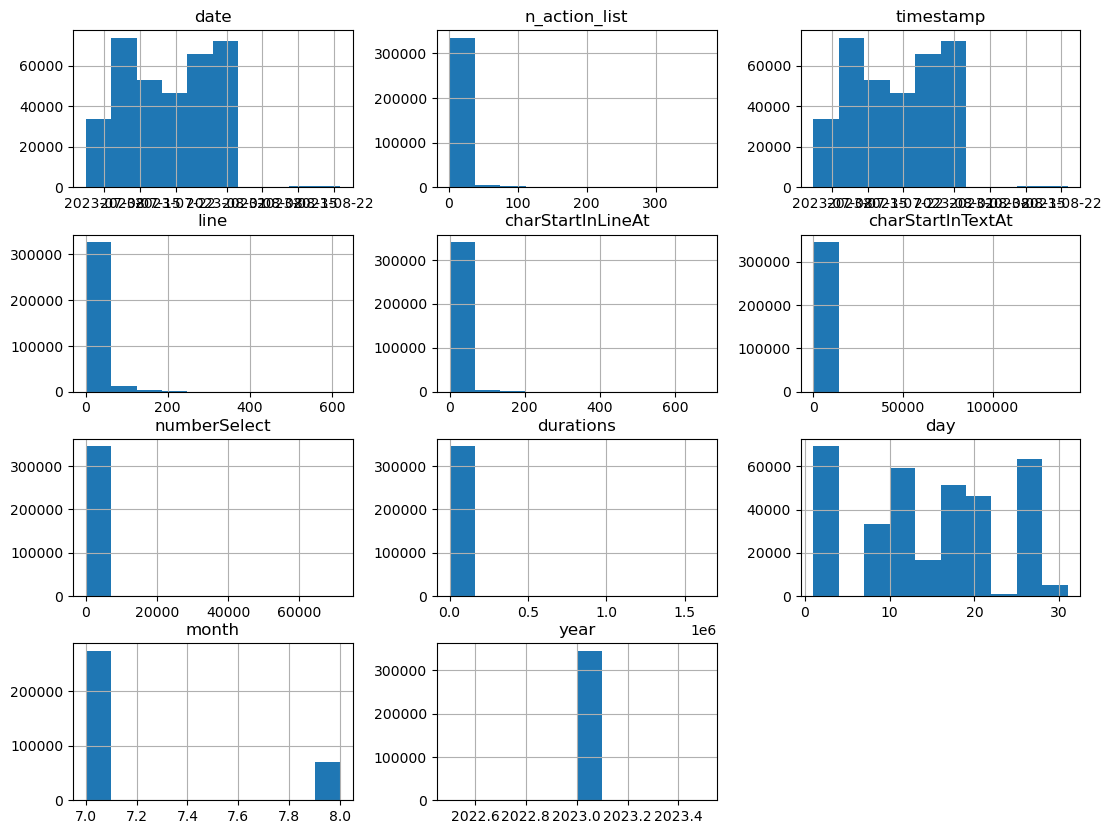

In [36]:
df.hist(figsize=(13,10))

C:\Users\Thear Sithysak\AppData\Local\Temp\ipykernel_20472\3771435302.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="CMRmap", annot=True,)


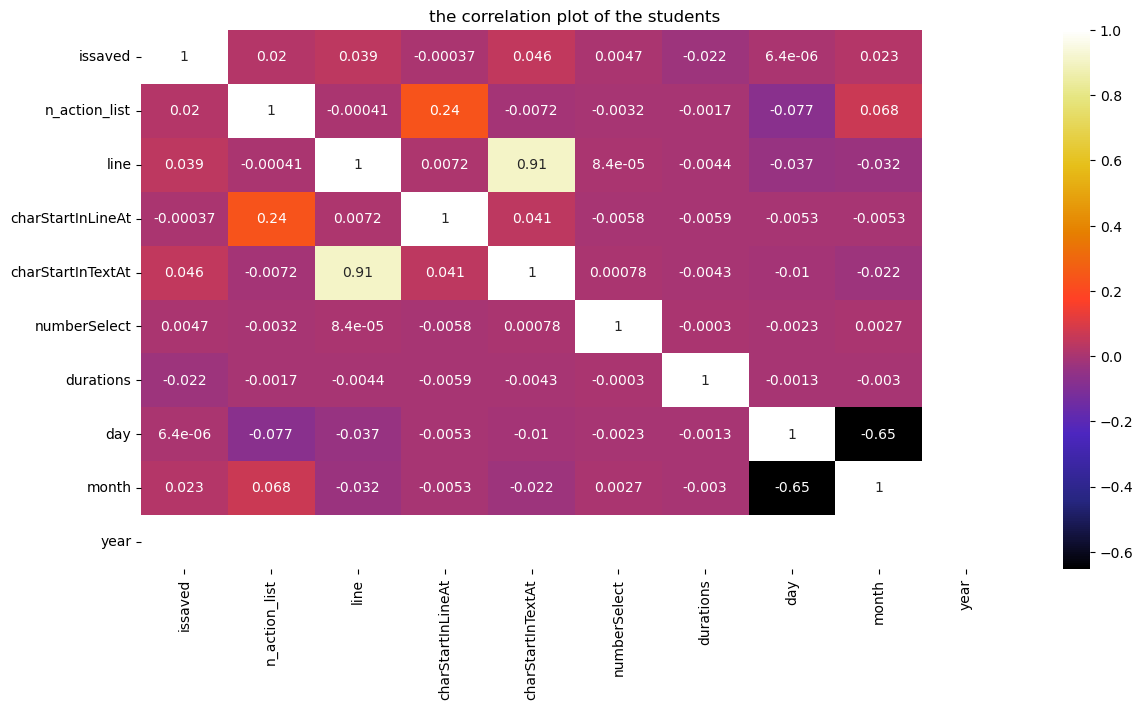

In [37]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True,)
plt.title("the correlation plot of the students")
plt.show()

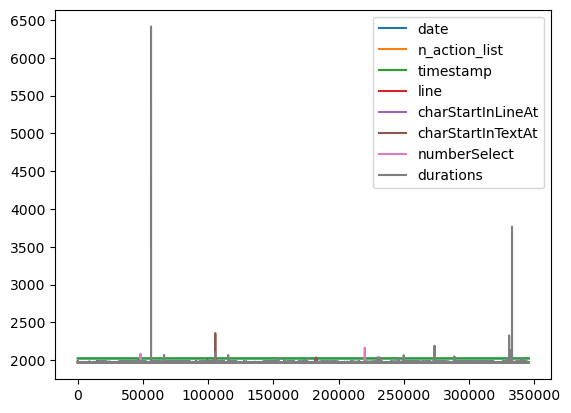

In [38]:
df = pd.read_json('output.json', lines= True)

df.plot()

plt.show()


In [39]:
# # Assuming 'df' is your DataFrame

# # Plotting datetime vs numerical columns
# df.plot(x='timestamp', y='n_action_list', kind='line', title='Number of Actions Over Time')
# plt.xlabel('Timestamp')
# plt.ylabel('Number of Actions')
# plt.show()

# # Plotting a bar chart
# df['language'].value_counts().plot(kind='bar', title='Language Distribution')
# plt.xlabel('Language')
# plt.ylabel('Count')
# plt.show()

# # Plotting a histogram
# df['durations'].plot(kind='hist', bins=20, title='Distribution of Durations')
# plt.xlabel('Duration')
# plt.ylabel('Frequency')
# plt.show()


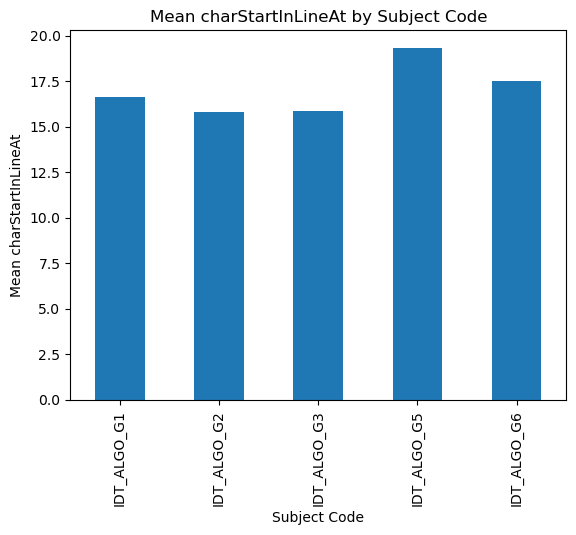

In [40]:
# Bar plot between 'charStartLineAt' and 'subject_code'
df.groupby('subject_code')['charStartInLineAt'].mean().plot(kind='bar', title='Mean charStartInLineAt by Subject Code')
plt.xlabel('Subject Code')
plt.ylabel('Mean charStartInLineAt')
plt.show()

C:\Users\Thear Sithysak\AppData\Local\Temp\ipykernel_20472\1348961885.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='language', y='charStartInLineAt', hue='action', data=df, estimator=sum, ci=None)


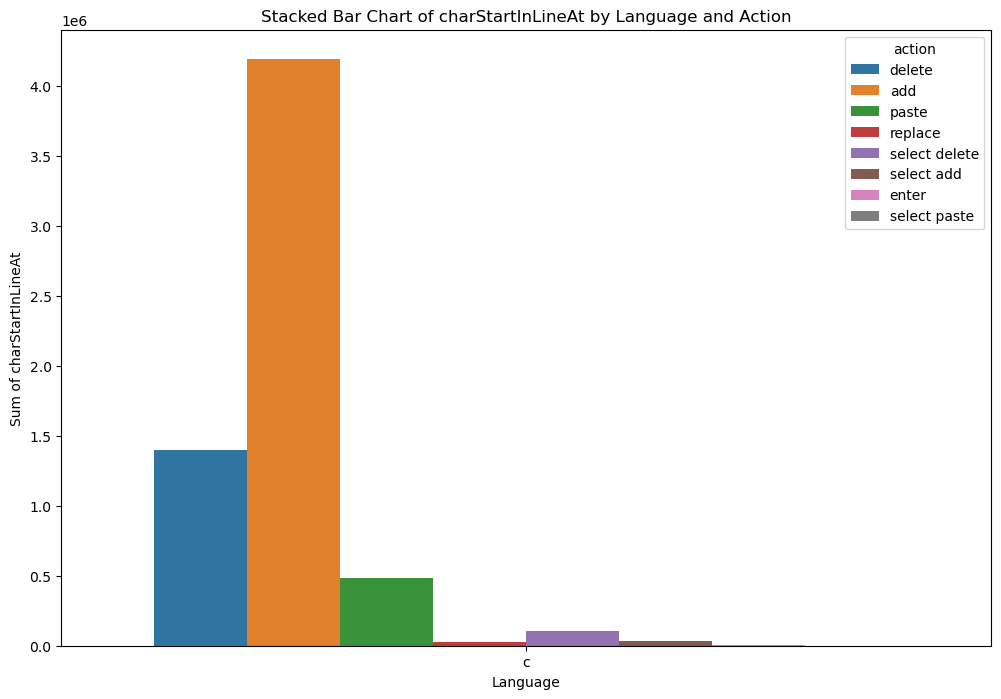

In [41]:
# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='language', y='charStartInLineAt', hue='action', data=df, estimator=sum, ci=None)
plt.title('Stacked Bar Chart of charStartInLineAt by Language and Action')
plt.xlabel('Language')
plt.ylabel('Sum of charStartInLineAt')
plt.show()

In [46]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                    issaved  n_action_list      line  charStartInLineAt  \
issaved            1.000000       0.019632  0.038771          -0.000373   
n_action_list      0.019632       1.000000 -0.000407           0.235644   
line               0.038771      -0.000407  1.000000           0.007169   
charStartInLineAt -0.000373       0.235644  0.007169           1.000000   
charStartInTextAt  0.046343      -0.007250  0.908545           0.041018   
numberSelect       0.004739      -0.003220  0.000084          -0.005801   
durations         -0.022493      -0.001694 -0.004416          -0.005860   

                   charStartInTextAt  numberSelect  durations  
issaved                     0.046343      0.004739  -0.022493  
n_action_list              -0.007250     -0.003220  -0.001694  
line                        0.908545      0.000084  -0.004416  
charStartInLineAt           0.041018     -0.005801  -0.005860  
charStartInTextAt           1.000000      0.000780  -0.004296  
numberSelect   

C:\Users\Thear Sithysak\AppData\Local\Temp\ipykernel_20472\321768582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


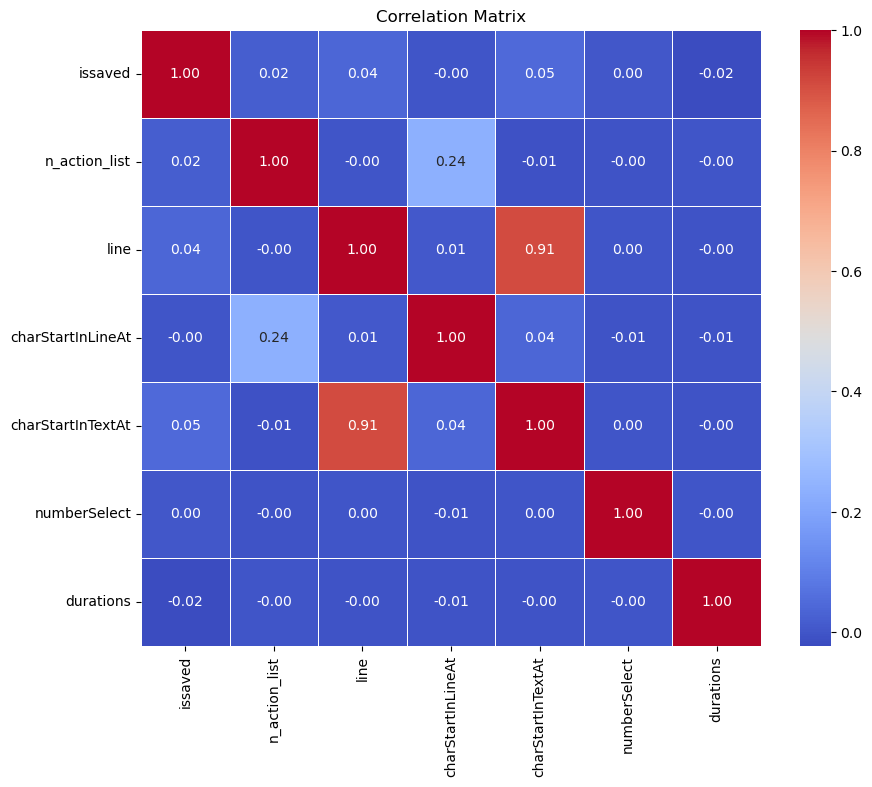

In [47]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

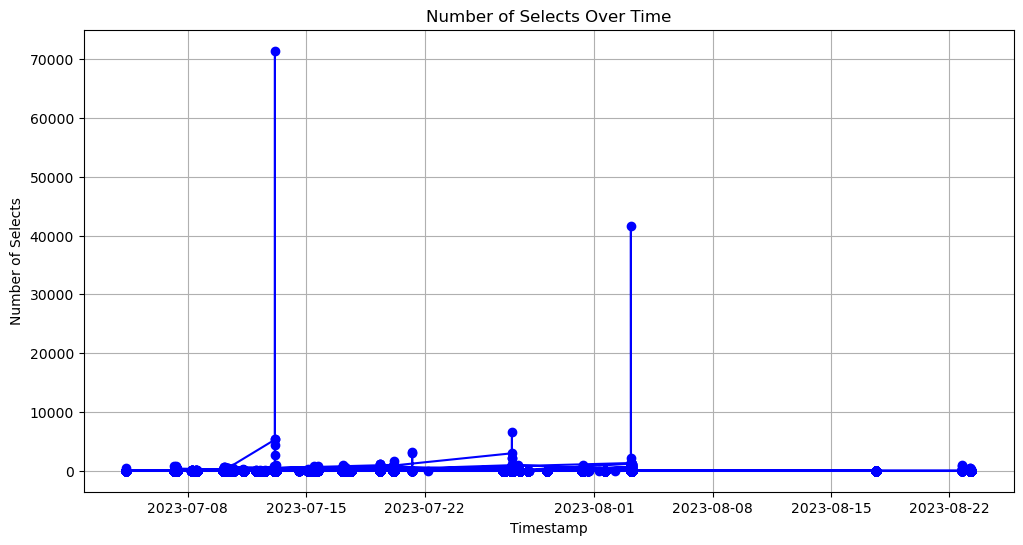

In [49]:
#Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['numberSelect'], marker='o', linestyle='-', color='b')
plt.title('Number of Selects Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Selects')
plt.grid(True)
plt.show()

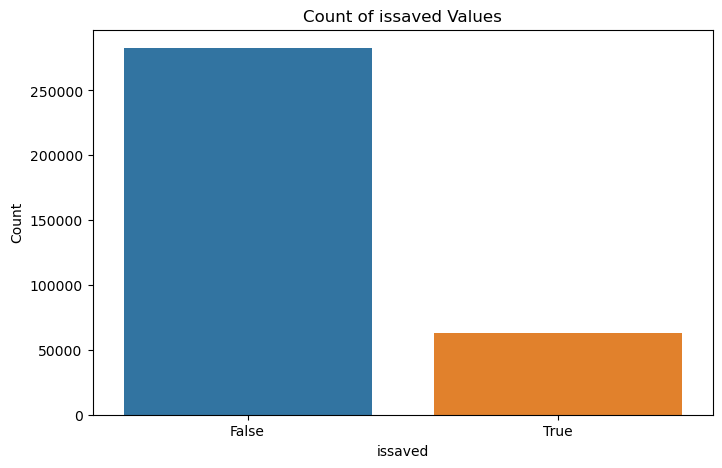

In [50]:
# Plotting bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x='issaved', data=df)
plt.title('Count of issaved Values')
plt.xlabel('issaved')
plt.ylabel('Count')
plt.show()

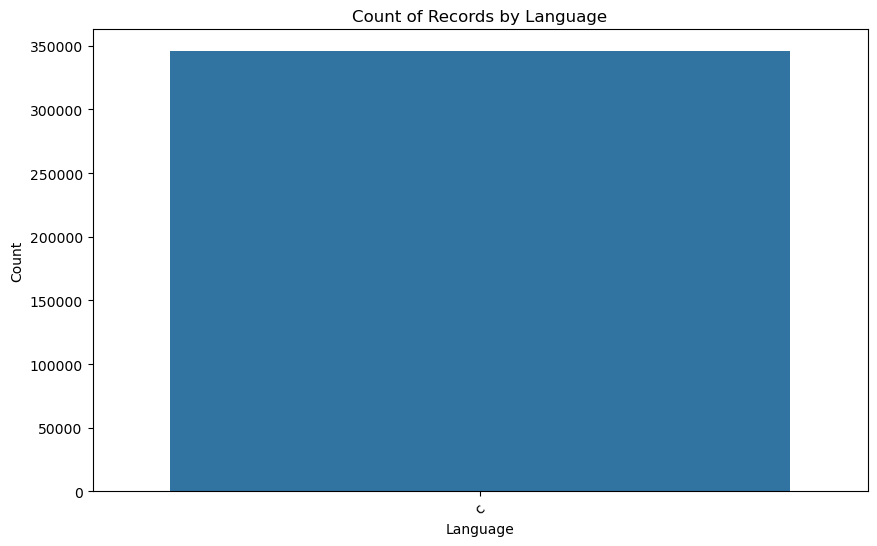

In [52]:
# Plotting count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='language', data=df, order=df['language'].value_counts().index)
plt.title('Count of Records by Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()